In [1]:
using Pkg
Pkg.add("Luxor")
Pkg.add("Colors")
Pkg.add("DataStructures")
Pkg.add("JLD2")
Pkg.add("FileIO")
using Luxor
using Colors
using DataStructures
using JLD2
using FileIO

    Updating registry at `C:\Users\17404\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`


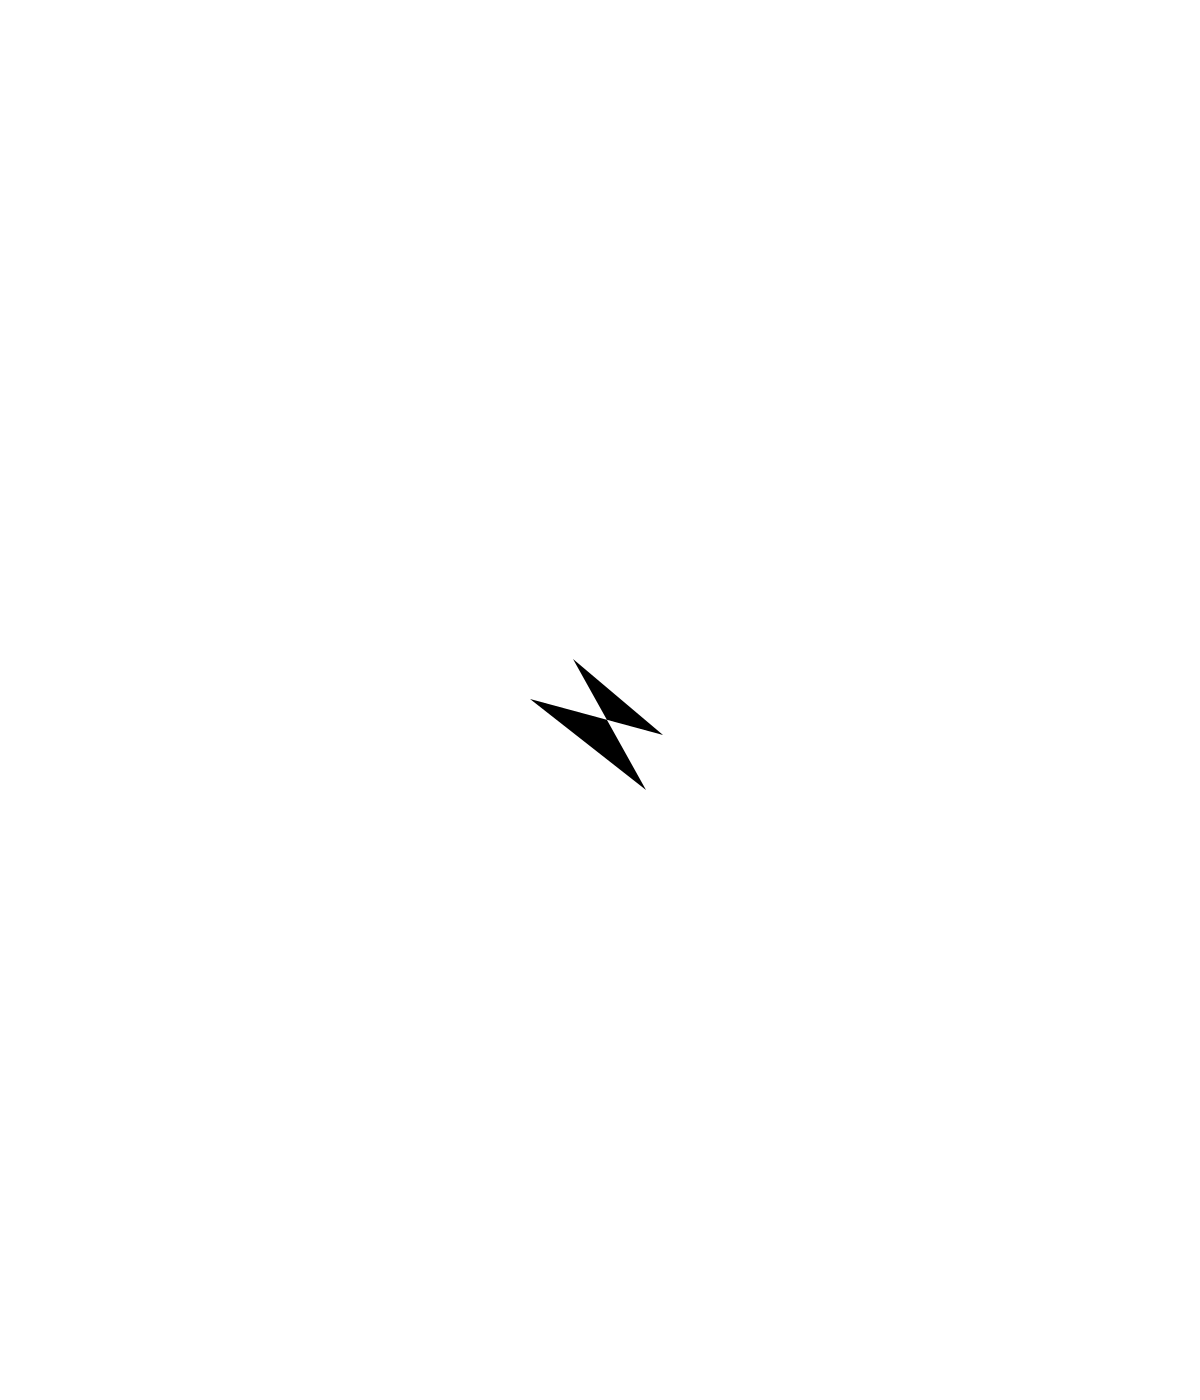

In [17]:
Drawing(1200, 1400)

origin()

randompoints = [Point(rand(-100:100), rand(-100:100)) for i in 1:4]

poly(randompoints, :fill)


finish()
preview()

In [33]:
phi = (1 + sqrt(5)) / 2
sidelength = 50
tolerance = 0.001

0.001

In [20]:
function dart(radialdistance, polarangle, orientation) #function for drawing a dart
    ```
    radialdistance is the distance between rotation center and the origin
    polarangle is the turing angle before the turle move forward by r
    orientation is the rotation degrees of starting drawing the dart or kite
    ```
    
    #move the turtle to the position of starting place by polar coordinate and rotation
    Penup(t)
    Turn(t, polarangle)
    Forward(t, radialdistance)
    Turn(t, -polarangle)
    Turn(t, orientation)
    Pendown(t)
    
    #start to draw a dart 
    Pencolor(t, "Black")
    Forward(t, sidelength)
    Turn(t, -36)
    Forward(t, sidelength)
    Turn(t, 144)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 144)
    
    #move the turtle back to the origin
    Penup(t)
    Turn(t, -orientation)
    Turn(t, polarangle)
    Forward(t, -radialdistance)
    Turn(t, -polarangle)
    Pendown(t)
end

dart (generic function with 1 method)

In [21]:
function kite(radialdistance, polarangle, orientation) #function for drawing a kite
    ```
    radialdistance is the distance between rotation center and the origin
    polarangle is the turing angle before the turle move forward by r
    orientation is the rotation degrees of starting drawing the dart or kite
    ```
    
    #move the turtle to the position of starting place by polar coordinate and rotation
    Penup(t)
    Turn(t, polarangle)
    Forward(t, radialdistance)
    Turn(t, -polarangle)
    Turn(t, orientation)
    Pendown(t)
    
    #start to draw a kite
    Pencolor(t, "Black")
    Turn(t, 108)
    Forward(t, sidelength)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength)
    Turn(t, -72)
    
    #move the turtle back to the origin
    Penup(t)
    Turn(t, -orientation)
    Turn(t, polarangle)
    Forward(t, -radialdistance)
    Turn(t, -polarangle)
    Pendown(t)
end

kite (generic function with 1 method)

In [22]:
function draw(graph) # function for drawing dart or kite by stored information
    for i in 1:length(graph)
        if graph[i][1] == "K"
            kite(graph[i][2],graph[i][3],graph[i][4])
        else
            dart(graph[i][2],graph[i][3],graph[i][4])
        end
    end
end

draw (generic function with 1 method)

In [23]:
function substitution(graph)
    
    number_tiles = length(graph)#Remember the number of tiles at the beginning
    
    for i in 1:length(graph)#Do substitution for each tile
        
        if graph[i][1] == "K"
            y = graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin((180 - graph[i][4]) * pi / 180)
            x = graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((180 - graph[i][4]) * pi / 180)
            new_radialdistance = sqrt(y^2+x^2)#find the new distance by doing a vector addition
            
            #Find the new angle based on the x-y relation
                if x > 0
                    new_polarangle = atan(y/x) * 180 /pi
                elseif x < 0 && y >= 0
                    new_polarangle = atan(y/x) * 180 /pi + 180
                elseif x < 0 && y < 0
                    new_polarangle = atan(y/x) * 180 /pi - 180
                elseif x == 0 && y > 0
                    new_polarangle = 90
                elseif x == 0 && y < 0
                    new_polarangle = -90
                elseif x == 0 && y == 0
                    new_polarangle = 0
                end
            
            #darw new tiles
            push!(graph, ["K",new_radialdistance,-new_polarangle,graph[i][4] + 108])
            push!(graph, ["K",new_radialdistance,-new_polarangle,graph[i][4] - 108])
            push!(graph, ["D",new_radialdistance,-new_polarangle,graph[i][4] + 144])
        else
            y = graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * phi * sin(-(graph[i][4] * pi / 180))
            x = graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * phi * cos(-(graph[i][4] * pi / 180))
            new_radialdistance = sqrt(y^2+x^2)
                if x > 0
                    new_polarangle = atan(y/x) * 180 /pi
                elseif x < 0 && y >= 0
                    new_polarangle = atan(y/x) * 180 /pi + 180
                elseif x < 0 && y < 0
                    new_polarangle = atan(y/x) * 180 /pi - 180
                elseif x == 0 && y > 0
                    new_polarangle = 90
                elseif x == 0 && y < 0
                    new_polarangle = -90
                elseif x == 0 && y == 0
                    new_polarangle = 0
                end
            
            push!(graph, ["K",new_radialdistance,-new_polarangle,graph[i][4] - 108])
            push!(graph, ["D",new_radialdistance,-new_polarangle,graph[i][4] + 144])
        end
    end
    
    for i in 1:number_tiles
        popfirst!(graph)
    end
    
end

substitution (generic function with 1 method)

In [24]:
function vertices(graph)
    
    for i in 1:length(graph)
        
        if graph[i][1] == "K"
            
            r = sqrt((phi * sidelength)^2 + sidelength^2 - 2 * phi * sidelength^2 * cos(72 * pi / 180))
            
            vertex1 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180))]
            vertex2 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((180 - graph[i][4] + 72) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin((180 - graph[i][4] + 72) * pi / 180)]
            vertex3 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + r * cos((180 - graph[i][4]) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + r * sin((180 - graph[i][4]) * pi / 180)]
            vertex4 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((180 - graph[i][4] - 72) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin((180 - graph[i][4] - 72) * pi / 180)]
            
        else
            r = sqrt(2 * (sidelength)^2 - 2 * sidelength^2 * cos(144 * pi / 180))
            
            vertex1 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180))]
            vertex2 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((graph[i][4]) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin(- (graph[i][4]) * pi / 180)]
            vertex3 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + r * cos((graph[i][4] - 18) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + r * sin(- (graph[i][4] - 18) * pi / 180)]
            vertex4 = [graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * phi * cos((graph[i][4] + 36) * pi / 180),
                       graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * phi * sin(-(graph[i][4] + 36) * pi / 180)]
        end

        push!(vertices_list,[vertex1,vertex2,vertex3,vertex4])
    end
end

vertices (generic function with 1 method)

In [25]:
function neighbor(graph,vertices_list)

    for i in 1:length(graph)
        neighbors = []

        for j in 1:length(graph)

            for m in 1:4 , n in 1:4
                if sqrt((vertices_list[i][m][1] - vertices_list[j][n][1])^2 + (vertices_list[i][m][2] - vertices_list[j][n][2])^2) < tolerance
                    push!(neighbors, j)
                end
            end
        end
        
        c = counter(neighbors)
        
        edge = []
        vertex = []
        
        for tile_number in keys(c)
            if c[tile_number] == 1
                push!(vertex, tile_number)
                
            elseif c[tile_number] == 2
                push!(edge, tile_number)
                
            end
        end
        
        neighbor_dic[i] = [edge,vertex]
    end
end

neighbor (generic function with 1 method)

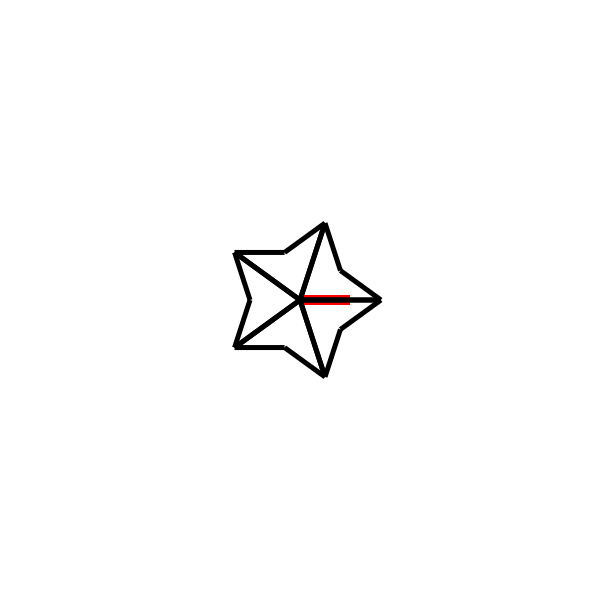

In [68]:
center_distance = phi * sidelength

graph = [["D",center_distance,72,-144],
        ["D",center_distance,144,-72],
        ["D",center_distance,216,0],
        ["D",center_distance,288,72],
        ["D",center_distance,0,144]]

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50
    )
    
    Penwidth(t,5)
    draw(graph)
end

In [78]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@svg begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end 5000 5000 "tiling.svg"

In [79]:
vertices_list = []
vertices(graph)
vertices_list

7985-element Vector{Any}:
 [[-277.25424859373476, -1754.1544988324374], [-292.70509831248216, -1706.6016730176798], [-211.8033988749874, -1706.6016730176798], [-236.8033988749874, -1783.5437614470611]]
 [[-277.25424859373476, -1754.1544988324374], [-236.80339887498738, -1783.5437614470611], [-302.25424859373476, -1831.0965872618187], [-327.25424859373476, -1754.1544988324374]]
 [[-277.25424859373476, -1754.1544988324374], [-327.25424859373476, -1754.1544988324374], [-367.7050983124821, -1783.5437614470611], [-342.70509831248216, -1706.6016730176798]]
 [[-186.8033988749879, -1783.5437614470613], [-146.3525491562405, -1812.933024061685], [-211.8033988749879, -1860.4858498764427], [-236.8033988749879, -1783.5437614470613]]
 [[-186.8033988749879, -1783.5437614470613], [-236.8033988749879, -1783.5437614470613], [-211.8033988749879, -1706.60167301768], [-146.3525491562405, -1754.1544988324376]]
 [[-186.8033988749879, -1783.5437614470613], [-146.3525491562405, -1754.1544988324376], [-130.9016

In [80]:
neighbor_dic = Dict()
neighbor(graph,vertices_list)
neighbor_dic

Dict{Any, Any} with 7985 entries:
  4986 => Vector{Any}[[4959, 4958, 4987, 4990], [4964, 4988, 4989, 4980, 5161]]
  7329 => Vector{Any}[[7330, 7341, 7340, 7333], [7332, 7314, 7331, 7336, 6602]]
  4700 => Vector{Any}[[4671, 4699, 4632, 4630], [4631, 4698, 4682]]
  4576 => Vector{Any}[[4575, 4763, 4774, 4577], [4569, 4777, 4579, 4653, 4778]]
  7144 => Vector{Any}[[7143, 7175, 7145, 7150], [7178, 7147, 7146, 7156, 7179]]
  6073 => Vector{Any}[[6102, 6150, 6074, 6149], [6144, 5971, 6070]]
  2288 => Vector{Any}[[2284, 2289, 2303, 2287], [4391, 2285, 2292, 2296, 2291]]
  1703 => Vector{Any}[[1676, 1704, 1675, 1707], [3009, 1705, 1681, 1697, 1706]]
  1956 => Vector{Any}[[1952, 1950, 1680, 1955], [1953, 3144, 1949, 1700, 1681, …
  2350 => Vector{Any}[[2351, 2324, 2339, 2325], [2343, 2133, 2319, 2347]]
  7685 => Vector{Any}[[7697, 7689, 7698, 7686], [7687, 7688, 7693, 7704, 7692]]
  5975 => Vector{Any}[[5974, 5936, 5946, 5934], [5925, 5935, 5957, 5973]]
  3406 => Vector{Any}[[3405, 3407, 3402, 

In [81]:
@save "neighbors of 7985.jld2" neighbor_dic